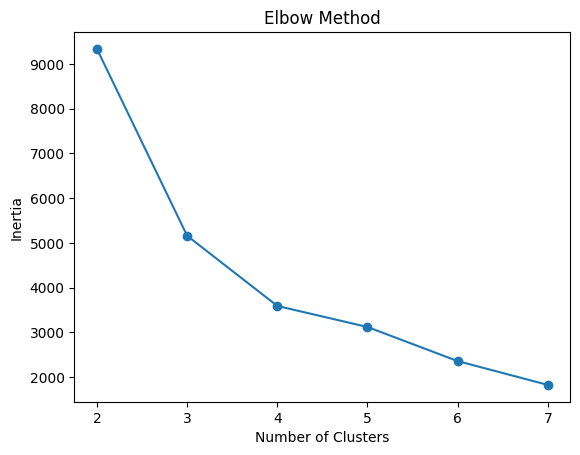

Cluster Summary:
         Recency  Frequency   Monetary          CLV  Churn
Cluster                                                   
0          43.00       4.47    1743.13     14841.84   0.00
1         242.98       1.66     596.88      1586.74   0.79
2           5.60     113.60  215543.67  22809254.67   0.00
3          15.43      48.55   29040.18   1549126.23   0.02

Customers per cluster:
Cluster
0    3207
1    1047
2       5
3      53
Name: count, dtype: int64


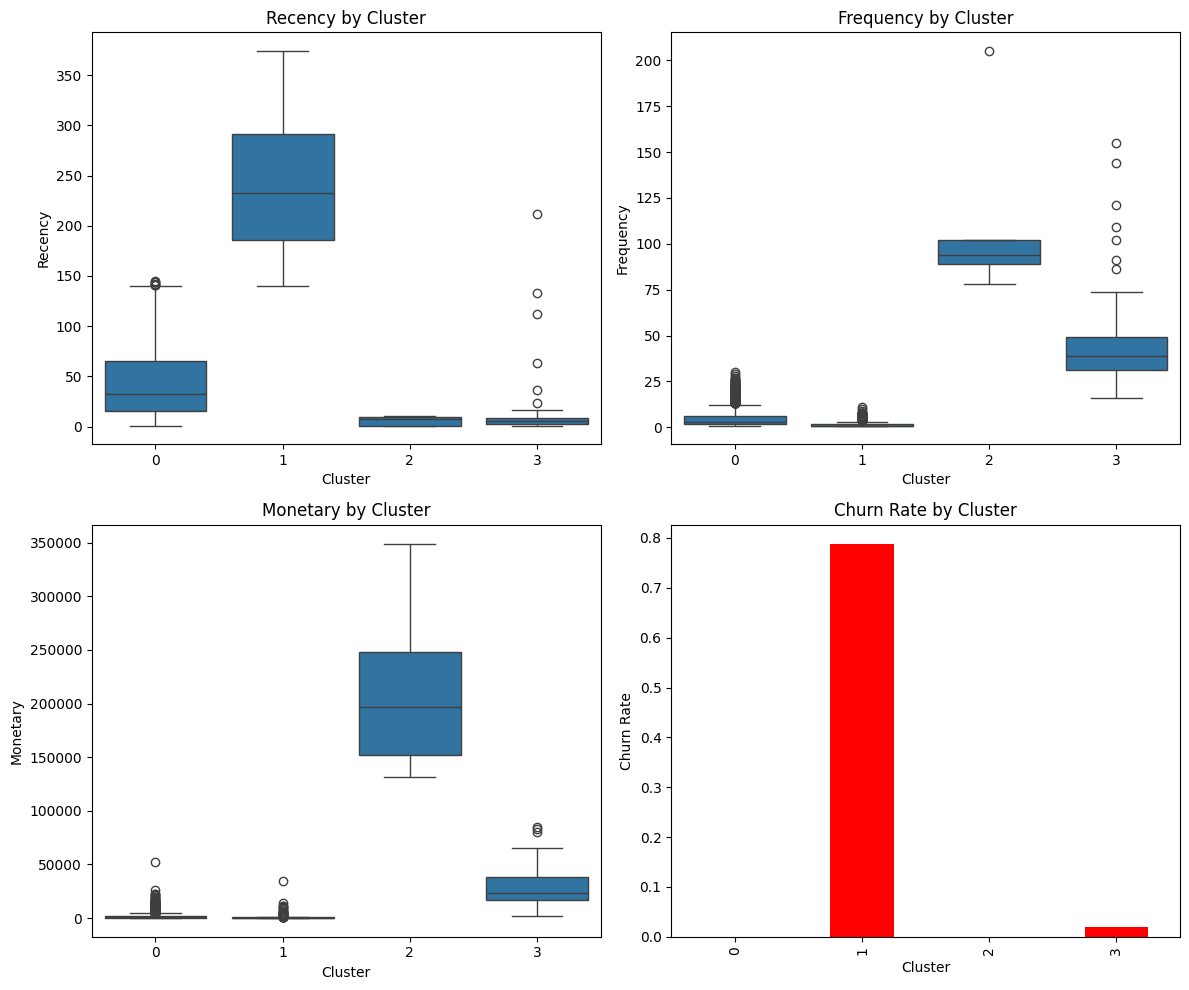

Churned (1) vs Active (0) Customers:
      Recency                  Frequency                 Monetary          \
         mean median  min  max      mean median min  max     mean  median   
Churn                                                                       
0       50.06   36.0    1  180      5.14    3.0   1  205  2387.65  901.93   
1      264.95  257.0  182  374      1.58    1.0   1   29   613.67  298.30   

                             CLV           
        min        max      mean   median  
Churn                                      
0      3.75  349164.35  69828.02  2682.39  
1      2.95   34095.26   2325.78   321.45  

Churned customers - Avg days since last purchase: 265 days
Churned customers - Avg frequency: 1.6 purchases
Churned customers - Avg spend: £613.67

Which clusters did churned customers come from?
Cluster
1    824
3      1
Name: count, dtype: int64
CLUSTER 2 - ACTUAL DATA
Number of customers: 5

📊 Frequency Statistics:
  Mean: 113.60
  Median: 94.00
  Min

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

rfm = pd.read_csv("../data/processed/rfm.csv")
rfm.head()

features = rfm[["Recency", "Frequency", "Monetary"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.plot(range(2, 8), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

#Group to nearest clusters: at 4 members each, at random from scaled features
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(scaled_features)

rfm.head()

#Customer Lifetime value
rfm["CLV"] = rfm["Monetary"] * rfm["Frequency"]
rfm.groupby("Cluster")["CLV"].mean()


# Define churn: inactive > 180 days: Churn Label Creation
rfm["Churn"] = (rfm["Recency"] > 180).astype(int)

rfm["Churn"].value_counts()

# Analyze cluster characteristics
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean',
    'CLV': 'mean',
    'Churn': 'mean'
}).round(2)

print("Cluster Summary:")
print(cluster_summary)

# Count customers per cluster
print("\nCustomers per cluster:")
print(rfm['Cluster'].value_counts().sort_index())

# Visualize clusters
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Recency by cluster
sns.boxplot(data=rfm, x='Cluster', y='Recency', ax=axes[0,0])
axes[0,0].set_title('Recency by Cluster')

# Frequency by cluster
sns.boxplot(data=rfm, x='Cluster', y='Frequency', ax=axes[0,1])
axes[0,1].set_title('Frequency by Cluster')

# Monetary by cluster
sns.boxplot(data=rfm, x='Cluster', y='Monetary', ax=axes[1,0])
axes[1,0].set_title('Monetary by Cluster')

# Churn rate by cluster
churn_by_cluster = rfm.groupby('Cluster')['Churn'].mean()
churn_by_cluster.plot(kind='bar', ax=axes[1,1], color='red')
axes[1,1].set_title('Churn Rate by Cluster')
axes[1,1].set_ylabel('Churn Rate')

plt.tight_layout()
plt.show()








# Compare churned vs active customers
comparison = rfm.groupby('Churn').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max'],
    'CLV': ['mean', 'median']
}).round(2)

print("Churned (1) vs Active (0) Customers:")
print(comparison)

# What were their last purchases?
churned_customers = rfm[rfm['Churn'] == 1]
print(f"\nChurned customers - Avg days since last purchase: {churned_customers['Recency'].mean():.0f} days")
print(f"Churned customers - Avg frequency: {churned_customers['Frequency'].mean():.1f} purchases")
print(f"Churned customers - Avg spend: £{churned_customers['Monetary'].mean():.2f}")

# Look at their cluster distribution
print("\nWhich clusters did churned customers come from?")
print(churned_customers['Cluster'].value_counts().sort_index())
















# Get the TRUE numbers for Cluster 2
cluster_2_data = rfm[rfm['Cluster'] == 2]

print("=" * 50)
print("CLUSTER 2 - ACTUAL DATA")
print("=" * 50)
print(f"Number of customers: {len(cluster_2_data)}")
print(f"\n📊 Frequency Statistics:")
print(f"  Mean: {cluster_2_data['Frequency'].mean():.2f}")
print(f"  Median: {cluster_2_data['Frequency'].median():.2f}")
print(f"  Min: {cluster_2_data['Frequency'].min()}")
print(f"  Max: {cluster_2_data['Frequency'].max()}")
print(f"  Standard deviation: {cluster_2_data['Frequency'].std():.2f}")

print(f"\n📊 Recency Statistics:")
print(f"  Mean: {cluster_2_data['Recency'].mean():.1f} days")
print(f"  Median: {cluster_2_data['Recency'].median():.1f} days")

print(f"\n📊 Monetary Statistics:")
print(f"  Mean: £{cluster_2_data['Monetary'].mean():.2f}")
print(f"  Median: £{cluster_2_data['Monetary'].median():.2f}")

print(f"\n📊 Churn Rate: {cluster_2_data['Churn'].mean()*100:.1f}%")

# Also check the distribution
print("\n📊 Frequency Distribution in Cluster 2:")
print(cluster_2_data['Frequency'].value_counts().sort_index().head(10))


# Compare all clusters side by side
print("\n" + "=" * 60)
print("COMPLETE CLUSTER COMPARISON")
print("=" * 60)

comparison = []
for cluster in range(4):
    data = rfm[rfm['Cluster'] == cluster]
    comparison.append({
        'Cluster': cluster,
        'Size': len(data),
        'Avg Frequency': data['Frequency'].mean(),
        'Median Frequency': data['Frequency'].median(),
        'Min Frequency': data['Frequency'].min(),
        'Max Frequency': data['Frequency'].max(),
        'Avg Recency': data['Recency'].mean(),
        'Avg Monetary': data['Monetary'].mean(),
        'Churn Rate': data['Churn'].mean() * 100
    })

cluster_df = pd.DataFrame(comparison)
print(cluster_df.round(2))


# Get complete cluster summary with ALL details
print("=" * 70)
print("COMPLETE CLUSTER ANALYSIS")
print("=" * 70)

for cluster in range(4):
    data = rfm[rfm['Cluster'] == cluster]
    print(f"\n📊 CLUSTER {cluster} - {len(data)} customers ({len(data)/len(rfm)*100:.1f}%)")
    print("-" * 50)
    print(f"Recency (days since last purchase):")
    print(f"  • Mean: {data['Recency'].mean():.1f}")
    print(f"  • Median: {data['Recency'].median():.1f}")
    print(f"  • Range: {data['Recency'].min()} - {data['Recency'].max()}")
    
    print(f"\nFrequency (# of purchases):")
    print(f"  • Mean: {data['Frequency'].mean():.2f}")
    print(f"  • Median: {data['Frequency'].median():.1f}")
    print(f"  • Range: {data['Frequency'].min()} - {data['Frequency'].max()}")
    
    print(f"\nMonetary (total spend):")
    print(f"  • Mean: £{data['Monetary'].mean():.2f}")
    print(f"  • Median: £{data['Monetary'].median():.2f}")
    print(f"  • Range: £{data['Monetary'].min():.2f} - £{data['Monetary'].max():.2f}")
    
    print(f"\nCLV (Customer Lifetime Value):")
    print(f"  • Mean: £{data['CLV'].mean():.2f}")
    
    print(f"\nChurn Rate: {data['Churn'].mean()*100:.1f}%")
    print("=" * 50)
